In [1]:
# https://www.tensorflow.org/tutorials/keras/classification

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
# create mnist-object
fashion_mnist = tf.keras.datasets.fashion_mnist

# download data and save it into multidimensional numpy-arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
type(train_images[0])

numpy.ndarray

In [4]:
# save class names 0 to 9
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# shows that 60.000 28x28 images are loaded
train_images.shape

(60000, 28, 28)

In [6]:
# shows that the label-set holds 60.000 labels
len(train_labels)

60000

In [7]:
# show verificaton dataset
test_images.shape
# len(test_labels) # returns 10000

(10000, 28, 28)

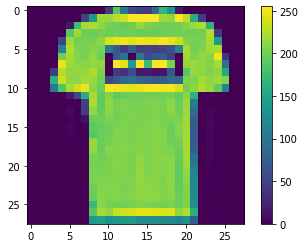

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# reducing the color-values to an value between 0 and 1
# it's very important to prepare the training and test dataset the same way
train_images = train_images / 255.0
test_images = test_images / 255.0

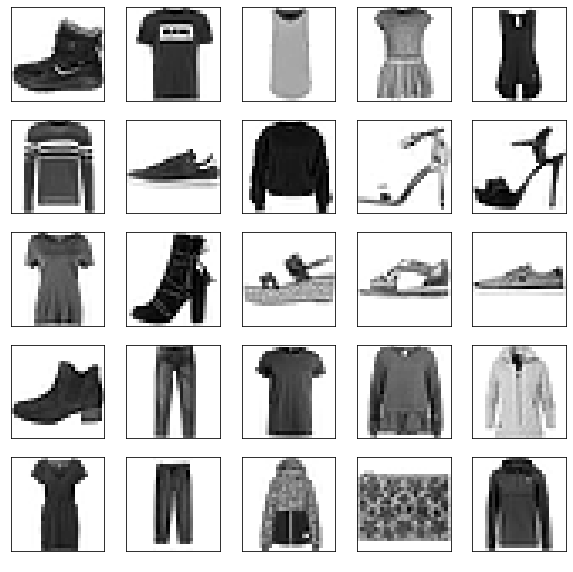

In [10]:
# verify preperation
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color="white")
plt.show()

In [11]:
# configuring the layers of the model
model = tf.keras.Sequential([
    # write the multidimensional arrays into one simple array - just preparing, not learning
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # create densely (= fully) connected neural layers
    # this layer has 128 nodes (= neurons)
    tf.keras.layers.Dense(128, activation='relu'),
    # this last layer has 10 nodes, each for one category
    tf.keras.layers.Dense(10)
])

In [12]:
# compiling the model

# Loss function —This measures how accurate the model is during training. You want
# to minimize this function to "steer" the model in the right direction.

# Optimizer —This is how the model is updated based on the data it sees and its
# loss function.

# Metrics —Used to monitor the training and testing steps. The following example
# uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# train the model by feeding the training data into it. The model learns to
# associate images and labels
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 785us/step - loss: 0.6255 - accuracy: 0.7805
Epoch 2/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.3762 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.3356 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 1s 712us/step - loss: 0.3098 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 1s 713us/step - loss: 0.2921 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 1s 705us/step - loss: 0.2754 - accuracy: 0.8999
Epoch 7/10
1875/1875 [==============================] - 1s 712us/step - loss: 0.2660 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 1s 719us/step - loss: 0.2549 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 1s 714us/step - loss: 0.2448 - accuracy: 0.9108
Epoch 10/10
1875/1875 [==============================] - 1s 694u

In [14]:
# evaluate accuracy by testing the model against the test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3435 - accuracy: 0.8824

Test accuracy: 0.8823999762535095


In [15]:
# Make predictions
# With the model trained, you can use it to make predictions about
# some images. The model's linear outputs, logits. Attach a softmax
# layer to convert the logits to probabilities, which are easier to interpret.
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [16]:
# show the first prediction
predictions[1]
# the numbers are showing the confidence of the model for every category

array([2.9054690e-05, 4.5476006e-14, 9.9911195e-01, 4.1258091e-10,
       7.7734777e-04, 4.1990255e-16, 8.1527171e-05, 1.3290740e-13,
       3.5807229e-11, 7.0101158e-14], dtype=float32)

In [17]:
# show the label with the highest confidence
np.argmax(predictions[1])

2

In [18]:
# check prediction
test_labels[1]

2

In [19]:
# Graph this to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

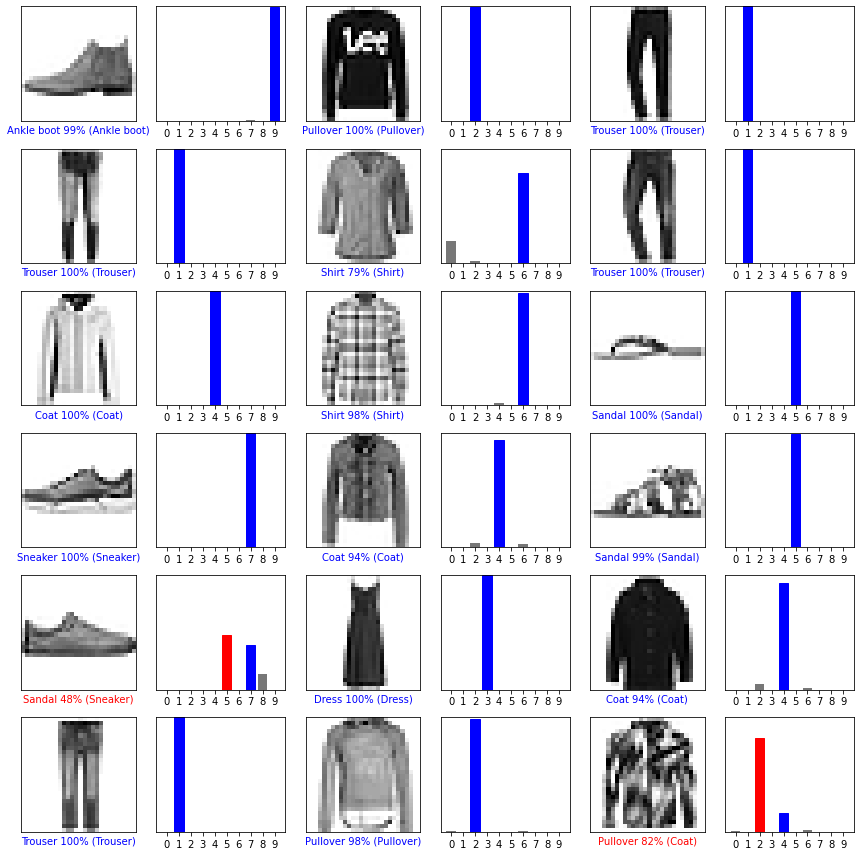

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 6
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()